# Test SPICE propagator developed

2019/11/07
Development notebook is SPICE_propagator_develop

Developed function is spicegator.py

In [1]:
import spiceypy as spice
import pandas as pd
import spicegator as sg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [2]:
# load spice kernels
spice.furnsh('../spice/naif0012.tls')

# define gravitational parameters
MU = 1.32712440018*10**11      # sun's gravitational parameter [km^3/s^2]
au2km = 1.49597870691*10**8    # 1 astronomical unit [AU] to [km]
g0 = 9.80665                   # gravitational acceleration [m/s^2]

In [3]:
# import ephemerides data from GTOC4 into pandas dataframe
elmnts = ['Name','Epoch','a','e','i','LAN','periap','theta']
df = pd.read_fwf('../gtoc4_problem_data.txt', sep='\t', skiprows=1)

# reassign column names
df.columns =  ['Name','Epoch','a','e','i','LAN','omega','M0']

# convert 'Name' from 'xxxx' to xxxx integers
num,tmp = df.shape
for i in range(num):
    dmp = df.at[i,'Name']
    df.at[i,'Name'] = int(dmp[1:5])
    
print(df.shape)
df.head(10)

# create smaller pandas dataframe to test propagator
# FIXME : create here spacecraft dataframe, then merge?
#  df1.merge(df2, left_on='lkey', right_on='rkey')
el_pd1 = df[0:10]
el_pd1.shape

(1436, 8)


(10, 8)

In [4]:
# test run function with el_pd1
# propagation range time
etr_utc = ['Jan 1, 2015', 'Jan 1, 2025']  # currently working with 6 months ~ 182 days
etr_MJD = [spice.str2et(etr_utc[0]), spice.str2et(etr_utc[1])]
# set time-step in seconds
steps = 100
dt = (spice.str2et(etr_utc[1]) - spice.str2et(etr_utc[0]))/steps
dt_day = dt/(60*60*24)
print(f'Current time-interval size with {steps} steps : {dt_day:.4} [days]')

# call function to propagate
et, sv, dr, drnorm = sg.propagate_spice(etr_MJD, el_pd1, MU=1.32712440018*10**11, step=steps, sv_option=True, dr_option=True)



Current time-interval size with 100 steps : 36.53 [days]
Propagation time: 0.21 [sec]


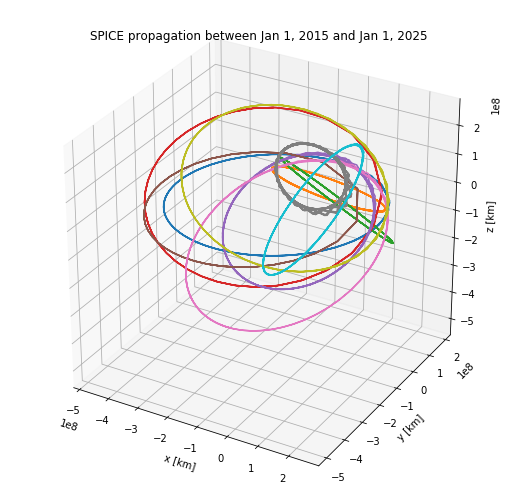

In [5]:
# plot propagated trajectories
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection = '3d')

# store number of bodies to propagate
[bdy,tmp] = el_pd1.shape
# store number of time steps
[tmp,steps,tmp] = sv.shape

# FIXME - ploting...? make a function?
for j in range(bdy):
    tmpx = []
    tmpy = []
    tmpz = []
    for i in range(steps):
        tmpx.append(sv[(j,i,0)])
        tmpy.append(sv[(j,i,1)])
        tmpz.append(sv[(j,i,2)])
    ax.plot(tmpx,tmpy,tmpz)

plt.title(f'SPICE propagation between {etr_utc[0]} and {etr_utc[1]}')
ax.set_xlabel('x [km]')
ax.set_ylabel('y [km]')
ax.set_zlabel('z [km]')
plt.show()

In [6]:
# plot computed relative distances of spacecraft to asteroids
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()

# convert time-axis
# https://naif.jpl.nasa.gov/pub/naif/toolkit_docs/C/cspice/et2utc_c.html
et_utc = []
for i in range(len(et)):
    et_utc.append(spice.et2utc(et[i],"ISOC",-3))
    
# number of objects propagated (without spacecraft)
for j in range(bdy-1):
    drlst = []
    for i in range(steps):
        drlst.append(drnorm[j,i,0]/au2km)
    ax.plot(et, drlst)
    
plt.title(f'SPICE propagation between {etr_utc[0]} and {etr_utc[1]}')

# plot threashold dr
plt.axhline(y=0.1, label='dr = 0.1 AU',ls='--',lw=1,c='b')

ax.set_xlabel('time')
ax.set_ylabel('dr [AU]')
plt.ylim(0, 5)
plt.grid()
plt.show()

print(et_utc)

AttributeError: 'NoneType' object has no attribute 'plot'

<Figure size 576x576 with 0 Axes>